In [ ]:
import pandas as pd
import numpy as np
#!pip install pycaret[full]

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/thehanh1998/MindX/main/Test1/loans_full_schema.csv')

In [ ]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


# Describe the dataset and any issues

In [ ]:
# Check rows and columns
df.shape

(10000, 55)

Dataset has 10000 rows and 55 columns

In [ ]:
# Check the data format of the columns
df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

Dataset have 3 types: int64, object, float65.

In [ ]:
# Check Null value
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

The data set has relatively low null columns, but there are some columns with a fairly large number of nulls, we will remove some columns with null values greater than 2000 to avoid affecting the results during the analysis data such as: annual_income_joint, verification_income_joint, debt_to_income_joint, months_since_last_delinq, months_since_90d_late.

Describe data

In [ ]:
df.describe(include='all')

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9167,9183.000000,10000,10000,1.000000e+04,10000,9976.000000,1.495000e+03,1455,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,2285.000000,10000.0000,10000.000000,10000.000000,10000.000000,8729.000000,10000.000000,9682.0,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,4741,NaN,50,3,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2,NaN,NaN,NaN,NaN,7,32,3,6,2,2,NaN,NaN,NaN,NaN,NaN
top,manager,NaN,CA,MORTGAGE,NaN,Source Verified,NaN,NaN,Not Verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,debt_consolidation,individual,NaN,NaN,NaN,NaN,B,B1,Mar-2018,Current,whole,Cash,NaN,NaN,NaN,NaN,NaN
freq,218,NaN,1330,4789,NaN,4116,NaN,NaN,611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5144,8505,NaN,NaN,NaN,NaN,3037,647,3617,9375,8206,9284,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.930306,NaN,NaN,7.922215e+04,NaN,19.308192,1.279146e+05,NaN,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,0.013800,0.167100,46.112473,0.0001,184.334000,2.663600,4.376100,7.340703,11.379600,0.0,0.0001,3.595300,27357.410300,13.030000,8.095000,5.230500,1.383100,94.648990,0.043300,0.123800,NaN,NaN,16361.922500,43.272000,12.427524,476.205323,NaN,NaN,NaN,NaN,NaN,NaN,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,NaN,3.703734,NaN,NaN,6.473429e+04,NaN,15.004851,7.016838e+04,NaN,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,0.126535,0.687768,21.748021,0.0100,2206.389859,2.935387,3.158583,5.981590,5.859705,0.0,0.0100,2.434689,26570.164081,7.874713,4.906606,3.327623,1.717274,9.155059,0.593852,0.337172,NaN,NaN,10301.956759,11.029877,5.001105,294.851627,NaN,NaN,NaN,NaN,NaN,NaN,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,NaN,0.000000,NaN,NaN,0.000000e+00,NaN,0.000000,1.920000e+04,NaN,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,NaN,NaN,1000.000000,36.000000,5.310000,30.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,NaN,NaN,4.500000e+04,NaN,11.057500,8.683350e+04,NaN,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,0.000000,0.000000,29.000000,0.0000,0.000000,1.000000,2.000000,2.000000,7.000000,0.0,0.0000,2.000000,10000.000000,7.

# Visualizations 

## Loan Status Count

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

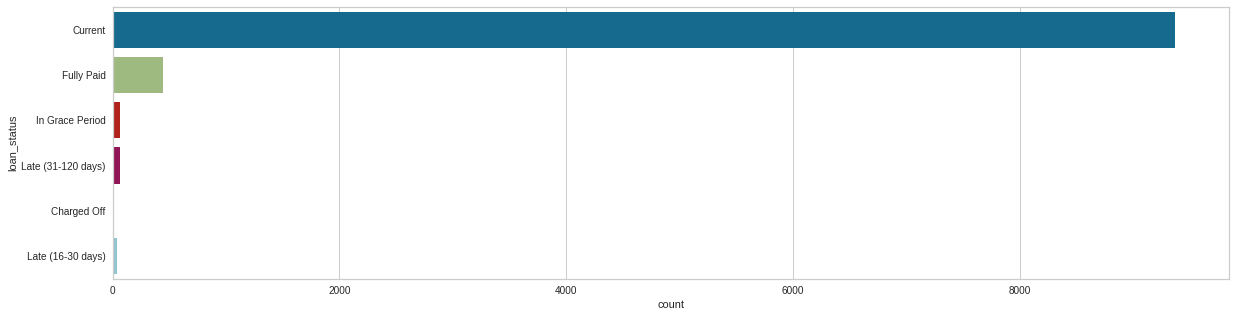

In [ ]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y='loan_status', data=df);

Current are the highest followed by Fully Paid. Most of the loan accounts are either Current or the payment is still in progress

## Installment vs Loan Status vs Count

<AxesSubplot:xlabel='installment', ylabel='Count'>

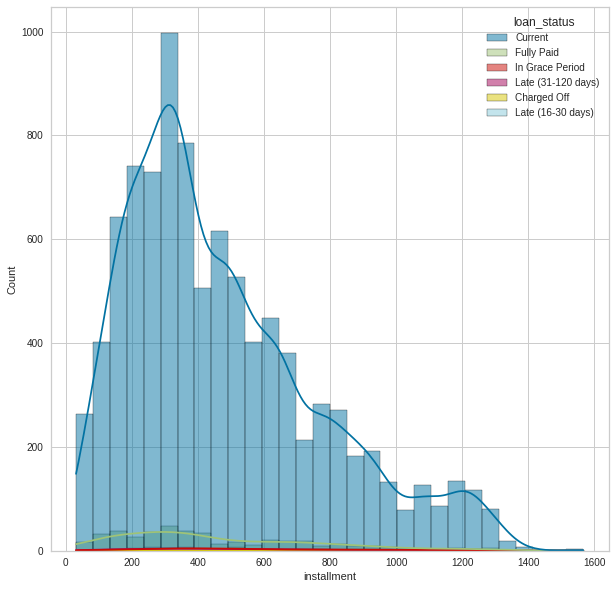

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="installment", bins=30, kde=True, hue="loan_status")

## Loan Status vs Other Attributes

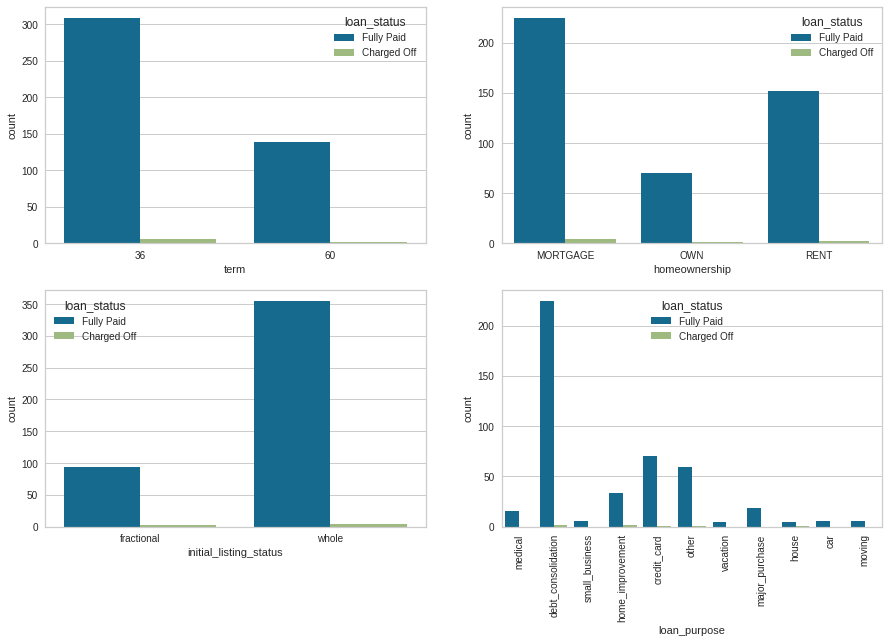

In [ ]:
paid_charged = df.loc[(df["loan_status"] == "Fully Paid") | (df["loan_status"] == "Charged Off")]

plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=paid_charged, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='homeownership', data=paid_charged, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='initial_listing_status', data=paid_charged, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='loan_purpose', data=paid_charged, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## Grade vs Loan Status

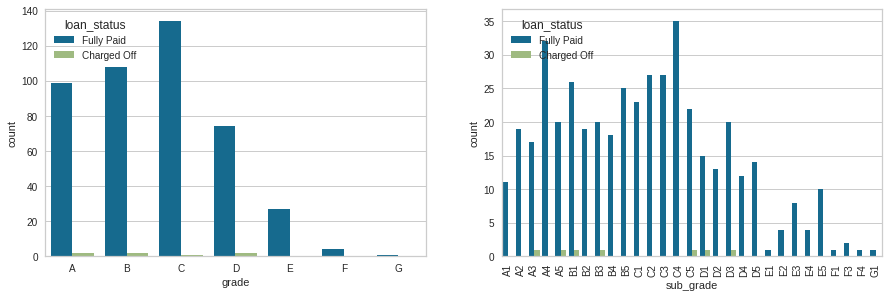

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(paid_charged.grade.unique().tolist())
sns.countplot(x='grade', data=paid_charged, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(paid_charged.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=paid_charged, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## Employee Title vs Loans Accepted

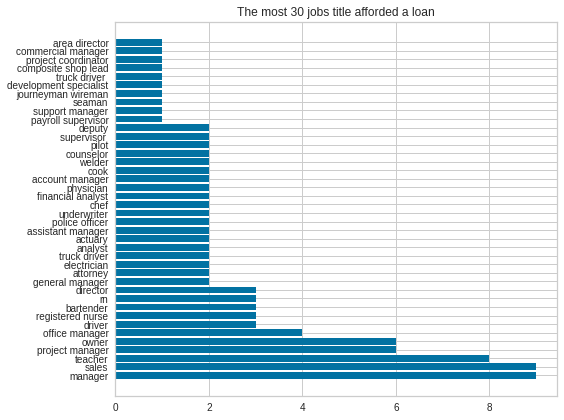

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(paid_charged.emp_title.value_counts()[:40].index, paid_charged.emp_title.value_counts()[:40])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

# Create a model to predict interest rate

In [ ]:
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

### Find Correlation between variable interest_rate with another variables

In [ ]:
df2 = df.loc[:,['interest_rate','loan_amount','term','grade','sub_grade','annual_income','homeownership','verified_income','debt_to_income']].copy()

In [ ]:
df2

,interest_rate,loan_amount,term,grade,sub_grade,annual_income,homeownership,verified_income,debt_to_income
0,14.07,28000,60,C,C3,90000.0,MORTGAGE,Verified,18.01
1,12.61,5000,36,C,C1,40000.0,RENT,Not Verified,5.04
2,17.09,2000,36,D,D1,40000.0,RENT,Source Verified,21.15
3,6.72,21600,36,A,A3,30000.0,RENT,Not Verified,10.16
4,14.07,23000,36,C,C3,35000.0,RENT,Verified,57.96
...,...,...,...,...,...,...,...,...,...
9995,7.35,24000,36,A,A4,108000.0,RENT,Source Verified,22.28
9996,19.03,10000,36,D,D3,121000.0,MORTGAGE,Verified,32.38
9997,23.88,30000,36,E,E2,67000.0,MORTGAGE,Verified,45.26
9998,5.32,24000,36,A,A1,80000.0,MORTGAGE,Source Verified,11.99


In [ ]:
# Change null values of debt_to_income field by mean value
mean = df2['debt_to_income'].mean()
df2['debt_to_income'] = df2['debt_to_income'].replace(np.nan,mean)

In [ ]:
# LabelEncoder for some fileds: grade, sub_grade, homeownership, verified_income
list_lable = ['grade', 'sub_grade', 'homeownership', 'verified_income']
for i in list_lable:
    df2[i] = LabelEncoder().fit_transform(df2[i])

In [ ]:
df2

,interest_rate,loan_amount,term,grade,sub_grade,annual_income,homeownership,verified_income,debt_to_income
0,14.07,28000,60,2,12,90000.0,0,2,18.01
1,12.61,5000,36,2,10,40000.0,2,0,5.04
2,17.09,2000,36,3,15,40000.0,2,1,21.15
3,6.72,21600,36,0,2,30000.0,2,0,10.16
4,14.07,23000,36,2,12,35000.0,2,2,57.96
...,...,...,...,...,...,...,...,...,...
9995,7.35,24000,36,0,3,108000.0,2,1,22.28
9996,19.03,10000,36,3,17,121000.0,0,2,32.38
9997,23.88,30000,36,4,21,67000.0,0,2,45.26
9998,5.32,24000,36,0,0,80000.0,0,1,11.99


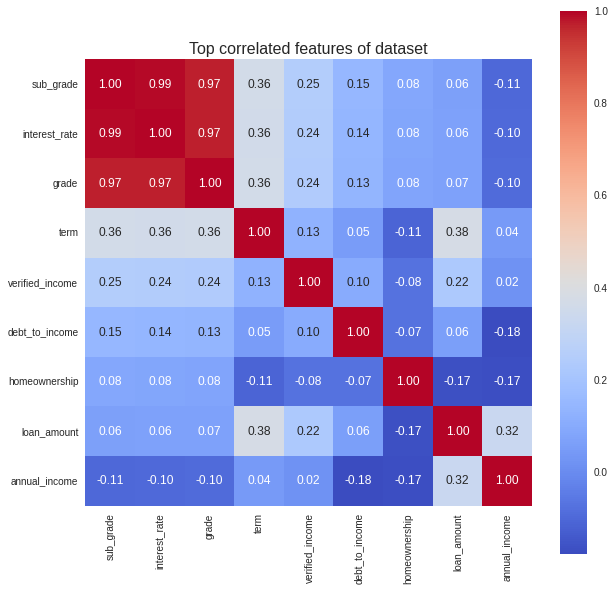

In [ ]:
top = 10
corr = df2.corr()
top15 = corr.nlargest(top, 'sub_grade')['sub_grade'].index
corr_top15 = df2[top15].corr()

fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()

**There are 2 variables grade and sub_grade have corrolation for variable interest_rate is large compared to other variables**

Kiểm tra mối tương quan giữa interest_rate và grade

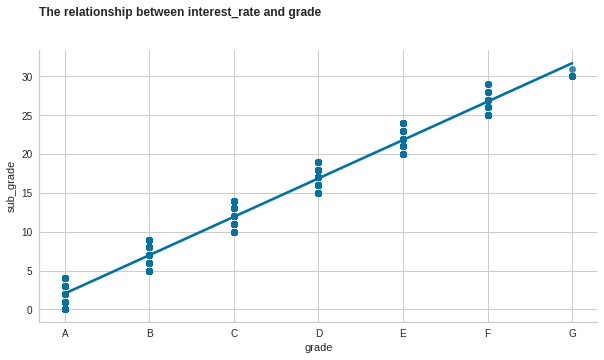

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.regplot(x=df2['grade'], y=df2['sub_grade'], data=df2)

ax.set_xticks((0,1,2,3,4,5,6))
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E', 'F','G'))

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)
plt.suptitle('The relationship between interest_rate and grade', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(df2['grade'], df2['sub_grade'])
print("Correlation Coefficient between grade and interest_rate is", pearson_coef, "and P-value is ", p_value)

Correlation Coefficient between grade and interest_rate is 0.9702897687820276 and P-value is  0.0


Check Correlation between interest_rate and grade

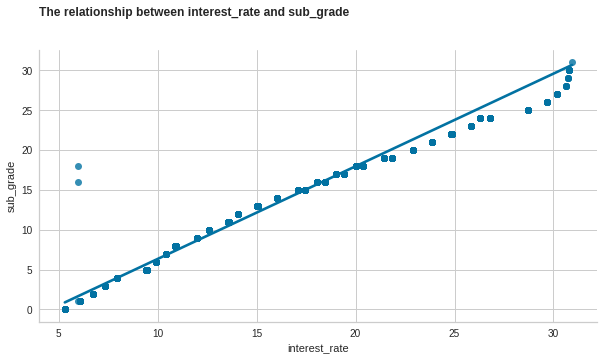

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.regplot(x=df2['interest_rate'], y=df2['sub_grade'], data=df2)

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)
plt.suptitle('The relationship between interest_rate and sub_grade', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()

In [ ]:
pearson_coef, p_value = stats.pearsonr(df2['interest_rate'], df2['sub_grade'])
print("Correlation Coefficient between sub_grade and interest_rate là", pearson_coef, "and P-value is ", p_value)

Correlation Coefficient between sub_grade and interest_rate là 0.9929205599072595 and P-value is  0.0


# Building model

## Scaling and Test Train split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df2[['grade','interest_rate']]
y = df2['sub_grade']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

### XGBoost model

### Random Forests model

In [ ]:
!pip install Jinja2

In [ ]:
!pip install cartopy

In [ ]:
pip install markupsafe==2.0.1

In [ ]:
from pycaret.classification import *
classification = setup(data = df2, target = 'sub_grade', use_gpu=True)

,Description,Value
0,session_id,2604
1,Target,sub_grade
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(10000, 9)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

In [ ]:
xgb = create_model('xgboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9996,0.0,0.9996,0.9996,0.9996,0.9995,0.9995
2,0.9983,0.0,0.9213,0.9978,0.9980,0.9982,0.9982
Mean,0.9993,0.0,0.9736,0.9991,0.9992,0.9992,0.9992
Std,0.0007,0.0,0.0370,0.0010,0.0009,0.0008,0.0008


In [ ]:
best = compare_models()

IntProgress(value=0, description='Processing: ', max=84)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:14:04
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9994,0.0,0.9897,0.9994,0.9994,0.9994,0.9994,0.026
rf,Random Forest Classifier,0.9930,0.0,0.9271,0.9933,0.9927,0.9926,0.9926,2.170
ridge,Ridge Classifier,0.4568,0.0,0.4155,0.3674,0.3351,0.4273,0.4387,0.039
nb,Naive Bayes,0.3992,0.0,0.3691,0.3884,0.3482,0.3669,0.3721,0.020
ada,Ada Boost Classifier,0.2257,0.0,0.1930,0.0794,0.1041,0.1789,0.2087,0.663
knn,K Neighbors Classifier,0.0633,0.0,0.0475,0.0655,0.0552,0.0114,0.0115,0.201
svm,SVM - Linear Kernel,0.0387,0.0,0.0285,0.0046,0.0064,-0.0014,-0.0041,0.613


=> From the above it can be seen that the "Decision Tree Classifier" model gives the highest ratio